In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import dbfread
from dbfread import DBF
import csv

import warnings; warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
import sklearn

import mglearn
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [63]:
data = pd.read_csv('Energi_Viborg_Dandas_data.csv')

data[0:-1]

print("Number of rows before removing NaNs: {}".format(data.shape[0]))




Number of rows before removing NaNs: 24143


In [64]:
#get data copied
datafull = data
datacopy = data

data = data.dropna()
print("Number of rows after removing NaNs: {}".format(data.shape[0]))



Number of rows after removing NaNs: 1258


In [65]:
#drop columns not needed
columns_to_be_removed = ['ID','mslink','XKoordinat','YKoordinat','Dobbeltled','EjerKompon','TransportK','SystemKode','DatoUdf']
data=data.drop(columns_to_be_removed,axis='columns')


#get data with only TVObsKode as 1,which means observed broken by TV and man
data_with_TVObsAndMan = data[data['TVObsKode'].isin([1])]
data_with_TVObsAndMan = data_with_TVObsAndMan.drop(data_with_TVObsAndMan[data_with_TVObsAndMan['DatoOprett']==data_with_TVObsAndMan['DatoSaneri']].index)
data_with_TVObsAndMan = data_with_TVObsAndMan.drop(data_with_TVObsAndMan[data_with_TVObsAndMan['DatoOpdate']==data_with_TVObsAndMan['DatoSaneri']].index)
drop_cols = ['DatoOprett','DatoOpdate','DatoSaneri']
data_with_TVObsAndMan = data_with_TVObsAndMan.drop(drop_cols,axis = 'columns')
data_with_TVObsAndMan.insert(data_with_TVObsAndMan.shape[1],'Times_Broken',2)
data_with_TVObsAndMan[0:-1]


print("Number of rows with both TVObs and manObs: {}".format(data_with_TVObsAndMan.shape[0]))



Number of rows with both TVObs and manObs: 68


In [66]:
# get the rest which means only observed broken by man
data_with_only_manObs = data[~data['LedningID'].isin(data_with_TVObsAndMan['LedningID'])]
data_with_only_manObs[0:-1]

print("Number of rows with only manObs: {}".format(data_with_only_manObs.shape[0]))

#test if datafull copied all data in data
print("Number of rows in datafull: {}".format(datafull.shape[0]))

#get data only observed broken by TV
datafull=datafull.drop(columns_to_be_removed,axis='columns')
data_with_only_TVObs = datafull[datafull['TVObsKode'].isin([1])]
data_with_only_TVObs[0:-1]

print("Number of rows with only TVObs: {}".format(data_with_only_TVObs.shape[0]))

list = [data_with_only_TVObs ,data_with_only_manObs]
data_one_broke = pd.concat(list)
data_one_broke = data_one_broke.drop(drop_cols,axis = 'columns')

data_one_broke.insert(data_one_broke.shape[1],'Times_Broken',1)

data_one_broke[0:-1]

print("Number of rows with only one broken: {}".format(data_one_broke.shape[0]))

#all broken pipes
all_list = [data_one_broke,data_with_TVObsAndMan]
data_all_broken = pd.concat(all_list)
data_all_broken[0:-1]

print("Number of rows with only all broken: {}".format(data_all_broken.shape[0]))

#get around 2000 rows with nan
datacopy = datacopy[datacopy['DatoSaneri'].isnull()]#man check as null
datacopy = datacopy.loc[datacopy['TVObsKode']==0]#tvchecked as null

#datacopy=datacopy.drop(columns_to_be_removed,axis='columns')
datacopy = datacopy.sample(n=2000)

datacopy[0:-1]
#datacopy now is random 2190 data rows selected for data group "no broken".

#add a column for "Time of broken"
drop_cols = ['DatoOprett','DatoOpdate','DatoSaneri']

#one_broken
#data_one_broke = data_one_broke.drop(drop_cols,axis = 'columns')
#data_one_broke.insert(data_one_broke.shape[1],'Times_Broken',1)
#twice_broken
#data_with_TVObsAndMan = data_with_TVObsAndMan.drop(drop_cols,axis = 'columns')
#data_with_TVObsAndMan.insert(data_with_TVObsAndMan.shape[1],'Times_Broken',2)
#no broken
datacopy = datacopy.drop(drop_cols,axis = 'columns')
datacopy.insert(datacopy.shape[1],'Times_Broken',0)

#merge into one table
list_zeroonetwo=[datacopy,data_one_broke,data_with_TVObsAndMan]
final_data_with_all_times_broken=pd.concat(list_zeroonetwo)
final_data_with_all_times_broken = final_data_with_all_times_broken.drop(columns_to_be_removed,axis = 'columns')
print("Number of rows with three types of broken: {}".format(final_data_with_all_times_broken.shape[0]))
final_data_with_all_times_broken[0:-1]



Number of rows with only manObs: 1187
Number of rows in datafull: 24143
Number of rows with only TVObs: 935
Number of rows with only one broken: 2122
Number of rows with only all broken: 2190
Number of rows with three types of broken: 4190


,LedningID,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,Funktionsk,KategoriAf,TVObsKode,Times_Broken
18925,198168,33.81,32.600000,83.10,14.560770,400.0,1.0,1999.0,0,1.0,0.0,0
1619,96593,42.38,42.090000,19.10,15.183246,355.0,4.0,1998.0,0,1.0,0.0,0
16345,185874,33.03,32.550000,65.82,7.292616,200.0,4.0,1988.0,0,1.0,0.0,0
23135,217559,26.17,26.070000,6.75,14.814815,200.0,1.0,1978.0,0,1.0,0.0,0
5582,119531,3.23,1.212475,45.59,44.253683,350.0,1.0,1963.0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20936,207536,35.81,35.680000,44.37,2.929908,191.0,4.0,1954.0,0,1.0,1.0,2
20940,207545,36.28,36.050000,47.96,4.795663,191.0,4.0,1954.0,0,1.0,1.0,2
21738,211010,48.30,47.530000,44.00,17.500000,190.0,4.0,1964.0,0,1.0,1.0,2
21881,211896,50.02,49.350000,64.48,10.390819,241.0,4.0,1970.0,0,1.0,1.0,2


In [67]:
#get current year
from datetime import date
today = date.today().year

#add a column for the final data group
final_data_with_all_times_broken['Age'] = today- final_data_with_all_times_broken['anlag_aar']



final_data_with_all_times_broken[0:-1]


,LedningID,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,Funktionsk,KategoriAf,TVObsKode,Times_Broken,Age
18925,198168,33.81,32.600000,83.10,14.560770,400.0,1.0,1999.0,0,1.0,0.0,0,22.0
1619,96593,42.38,42.090000,19.10,15.183246,355.0,4.0,1998.0,0,1.0,0.0,0,23.0
16345,185874,33.03,32.550000,65.82,7.292616,200.0,4.0,1988.0,0,1.0,0.0,0,33.0
23135,217559,26.17,26.070000,6.75,14.814815,200.0,1.0,1978.0,0,1.0,0.0,0,43.0
5582,119531,3.23,1.212475,45.59,44.253683,350.0,1.0,1963.0,0,1.0,0.0,0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20936,207536,35.81,35.680000,44.37,2.929908,191.0,4.0,1954.0,0,1.0,1.0,2,67.0
20940,207545,36.28,36.050000,47.96,4.795663,191.0,4.0,1954.0,0,1.0,1.0,2,67.0
21738,211010,48.30,47.530000,44.00,17.500000,190.0,4.0,1964.0,0,1.0,1.0,2,57.0
21881,211896,50.02,49.350000,64.48,10.390819,241.0,4.0,1970.0,0,1.0,1.0,2,51.0


In [68]:

X = final_data_with_all_times_broken.loc[:,('fra_kote','Laengde')]
y = final_data_with_all_times_broken['Times_Broken'] 
X = pd.get_dummies(X)

X


,fra_kote,Laengde
18925,33.81,83.10
1619,42.38,19.10
16345,33.03,65.82
23135,26.17,6.75
5582,3.23,45.59
...,...,...
20940,36.28,47.96
21738,48.30,44.00
21881,50.02,64.48
22072,49.51,65.90


In [69]:
y

18925    0
1619     0
16345    0
23135    0
5582     0
        ..
20940    2
21738    2
21881    2
22072    2
23303    2
Name: Times_Broken, Length: 4190, dtype: int64

In [70]:
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

alphas = 10**np.linspace(-10, 10, 100)

ridge = Ridge(normalize = True)
coefs = []


In [71]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
frakote_coe = [coef[0] for coef in coefs]
Laengde_coe = [coef[1] for coef in coefs]

Text(0, 0.5, 'weights')

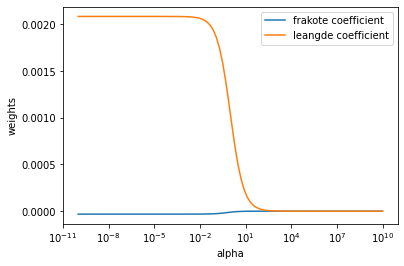

In [72]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, frakote_coe, label="frakote coefficient")
ax.plot(alphas, Laengde_coe, label="leangde coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [73]:
for alpha in [alphas[0], alphas[50], alphas[-1]]:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(X_train, y_train), 
                                                              ridge.score(X_test,y_test)))
    print("")
    



alhpa = 1e-10
R^2 on train data is 0.01987091302798427 and on test data is -0.013324001531172192

alhpa = 1.2618568830660184
R^2 on train data is 0.013681051483494855 and on test data is -0.0009631947658239604

alhpa = 10000000000.0
R^2 on train data is 3.97148980368911e-12 and on test data is -3.365974914348868e-06



In [74]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(X_train, y_train), 
                                                              ridgecv.score(X_test,y_test)))



R^2 on train data is 0.019828075885187868 and on test data is -0.01182004354276045


In [78]:
pd.Series(ridgecv.coef_, index=X.columns)

fra_kote   -0.000116
Laengde     0.002521
dtype: float64

Text(0, 0.5, 'weights')

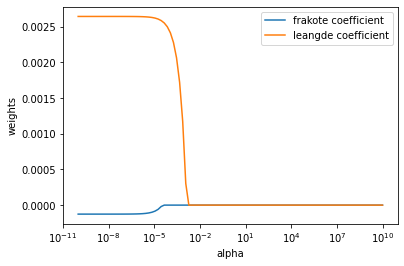

In [75]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

frakote_coe = [coef[0] for coef in coefs]
Laengde_coe = [coef[1] for coef in coefs]

ax = plt.gca()
ax.set_xscale('log')

ax.plot(alphas, frakote_coe, label="frakote coefficient")
ax.plot(alphas, Laengde_coe, label="leangde coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')



In [76]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))



R^2 on train data is 0.019758684810140537 and on test data is -0.011006877604978538


In [77]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)


fra_kote   -0.000000
Laengde     0.002456
dtype: float64